In [30]:
# --- setup: imports + config
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

PROCESSED_TRENDS_DB = "../db/trends_processed.db"
PROCESSED_TRENDS_TABLE = "trends_processed"

FORECAST_TRENDS_DB = "../db/trends_forecast.db"
FORECAST_TRENDS_TABLE = "trends_forecast"


# --- data loaders
def load_actuals() -> pd.DataFrame:
    with sqlite3.connect(PROCESSED_TRENDS_DB) as con:
        df = pd.read_sql(f"SELECT date, keyword, value FROM {PROCESSED_TRENDS_TABLE}", con)
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    return df.dropna(subset=["date"]).sort_values(["keyword", "date"])

def load_forecast() -> pd.DataFrame:
    with sqlite3.connect(FORECAST_TRENDS_DB) as con:
        df = pd.read_sql(f"SELECT * FROM {FORECAST_TRENDS_TABLE}", con)
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    return df.dropna(subset=["date"]).sort_values(["keyword", "date"])

# --- plotting
def plot_keyword_forecast(keyword: str):
    actuals = load_actuals()
    forecast = load_forecast()

    a = actuals[actuals["keyword"] == keyword].sort_values("date")
    f = forecast[forecast["keyword"] == keyword].sort_values("date")

    if a.empty:
        print(f"No actuals for keyword='{keyword}'")
        return
    if f.empty:
        print(f"No forecast for keyword='{keyword}'")
        return

    last_actual_date = a["date"].max()

    # plot
    plt.figure(figsize=(10, 5))
    plt.plot(a["date"], a["value"], marker="o", linewidth=1.5, label="Actuals")
    plt.plot(f["date"], f["forecast"], marker="o", linestyle="--", linewidth=1.5, label="Forecast")

    # optional CI if present
    if {"lower_ci", "upper_ci"}.issubset(f.columns):
        plt.fill_between(f["date"], f["lower_ci"], f["upper_ci"], alpha=0.2, label="95% CI")

    # vertical split
    plt.axvline(last_actual_date, linestyle=":", linewidth=1)
    plt.title(f"Trend: {keyword} (actuals vs forecast)")
    plt.xlabel("Date")
    plt.ylabel("Search interest")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_all_keywords(limit: int | None = None):
    actuals = load_actuals()
    kws = list(actuals["keyword"].dropna().unique())
    if limit is not None:
        kws = kws[:limit]
    for kw in kws:
        plot_keyword_forecast(kw)

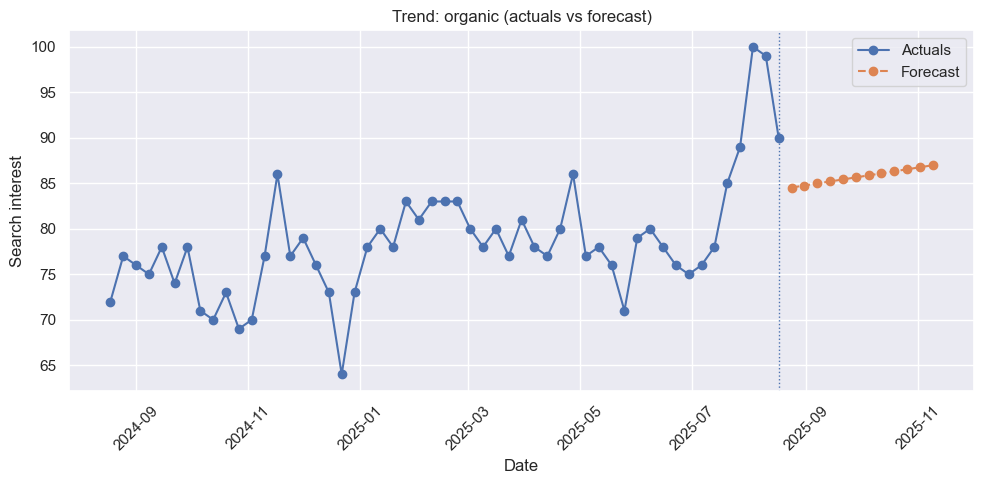

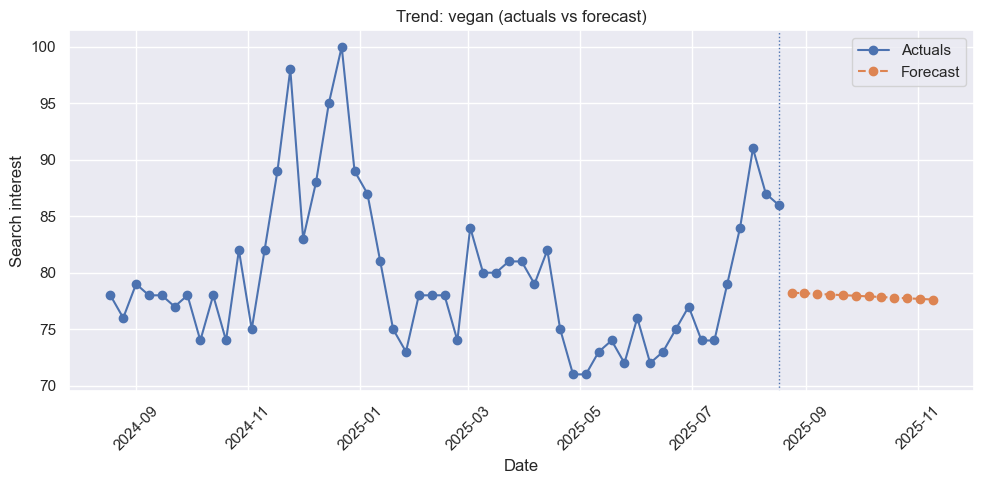

No forecast for keyword='100% vegan'


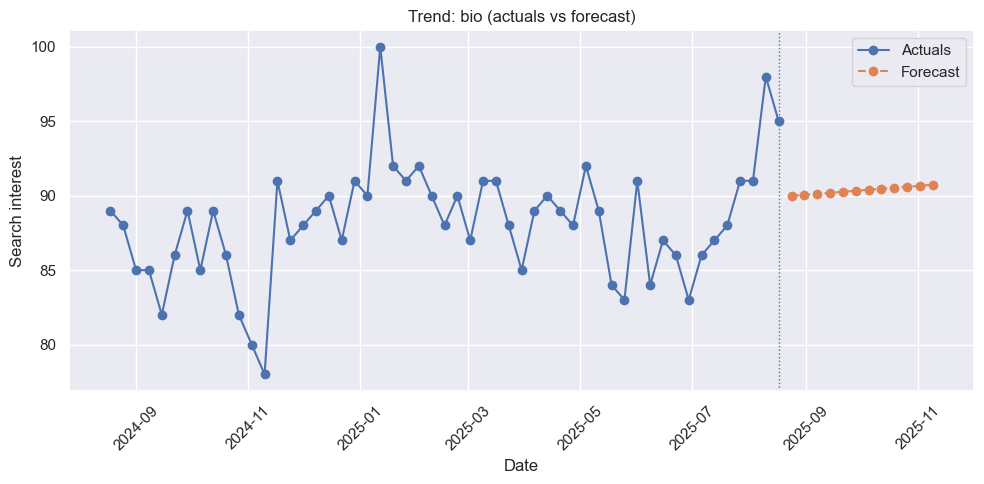

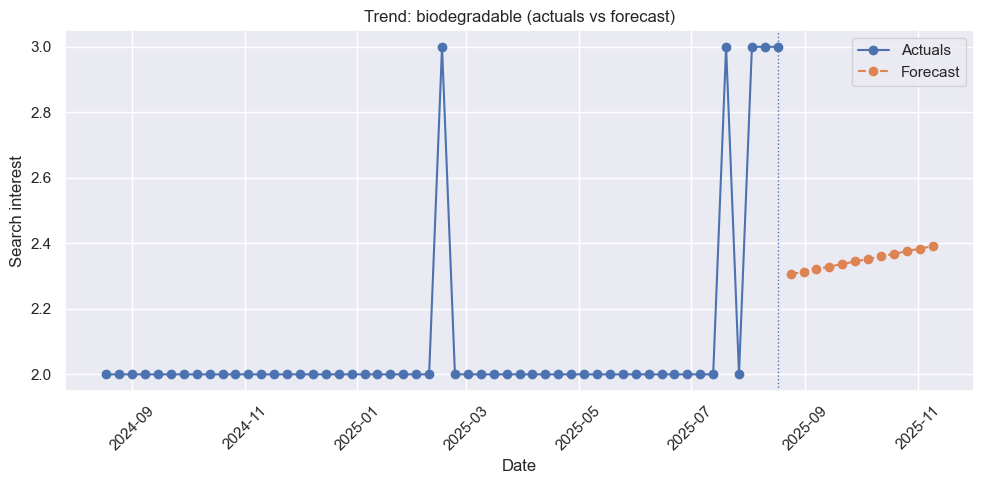

No forecast for keyword='compostable'


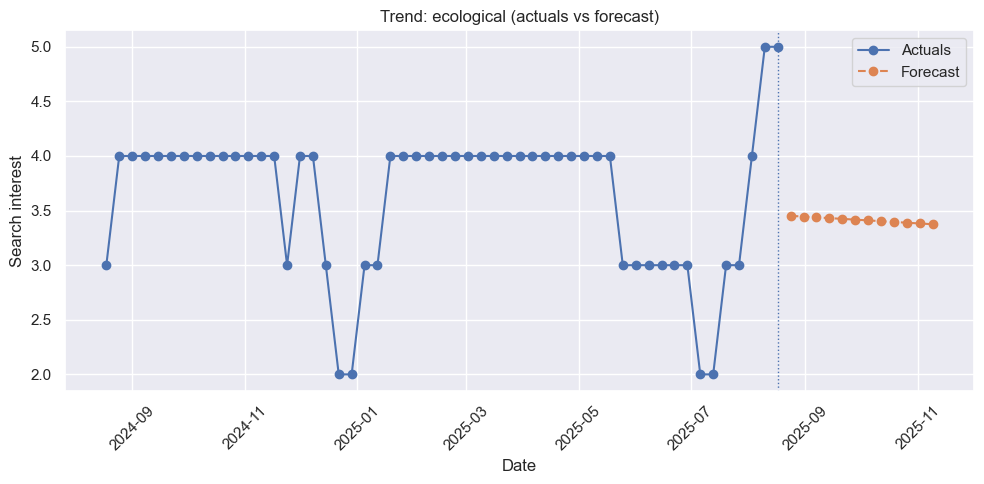

In [31]:
plot_keyword_forecast("organic")
plot_keyword_forecast("vegan")

# or loop all (first 5)
plot_all_keywords(limit=5)

In [32]:
with sqlite3.connect(FORECAST_TRENDS_DB) as con:
        df1 = pd.read_sql(f"SELECT * FROM {FORECAST_TRENDS_TABLE}", con)

In [33]:
df1[df1['keyword']=='100% vegan'].head(3)

,keyword,date,forecast,n_obs,slope,intercept


In [34]:
with sqlite3.connect(PROCESSED_TRENDS_DB) as con:
        df2 = pd.read_sql(f"SELECT date, keyword, value FROM {PROCESSED_TRENDS_TABLE}", con)

In [35]:
df2[df2['keyword']=='100% vegan'].head(3)

,date,keyword,value
0,2024-08-18,100% vegan,0
1,2024-08-25,100% vegan,0
2,2024-09-01,100% vegan,0
